In [18]:
"""231215
    사전 작업
    1)csv 파일을 읽어서  mysql 테이블에 insert
    2)mysqlclient 패키지를 미리 설치해야 함(cmd창 → pip install mysqlclient)
    """
# 외부기능 모듈 → .py인 파일
import csv
import MySQLdb

input_file = "c:/data/db/input.csv"
# 자료형 자동

# mySQL서버에 접속 → 변수명=값
conn = MySQLdb.connect(
    host="localhost",
    port=3306,
    db="my_suppliers",
    user="user",
    passwd="1234",
    charset="utf8",
)
cursor = conn.cursor()

sql = "delete from suppliers"  # 레코드 삭제
cursor.execute(sql)
# 커서   실행
conn.commit()

In [20]:
# csv 파일을 로딩(필드 구분자는 쉼표)
file_reader = csv.reader(open(input_file, "r"), delimiter=",")
#                    파일오픈 파일명    읽기전용   구분자     → cf. r=read(읽기전용), w=write

# 제목행을 읽음
header = next(file_reader)
#      한 라인 이동
for row in file_reader:
    #  현재행   파일참조
    data = []  # 빈 리스트
    if len(row) > 0:
        # 자료수
        for idx in range(len(header)):  # 블록시작
            #          cf.range(5) → 0~4까지 출력
            data.append(row[idx])  # 블록종료
        print(data)  # 들여쓰기가 끝나면 블록 종료 → 새로운 문장
        cursor.execute("insert into suppliers values (%s, %s, %s, %s, %s)", data)
        # 커서 → SQL을 실행, 결과탐색                   %: 데이터 위치, s: 스트링
conn.commit()


cursor.execute("select * from suppliers")
rows = cursor.fetchall()
# 커서: 테이블을 참조(시작주소를 저장) → fetchall(): 커서가 가리키는 내용을 dump
for row in rows:
    #  레코드  리스트
    output = []
    for idx in range(len(row)):
        output.append(str(row[idx]))
    print(output)

['A', '001-1001', '2341', '500000', '2014-01-20']
['A', '001-1001', '2341', '500000', '2014-01-20']
['A', '001-1001', '5467', '750000', '2014-01-20']
['A', '001-1001', '5467', '750000', '2014-01-20']
['B', '50-9501', '7009', '250000', '2018-01-30']
['B', '50-9501', '7009', '250000', '2018-01-30']
['B', '50-9505', '6650', '125000', '2017-02-03']
['B', '50-9505', '6650', '125000', '2017-02-03']
['C', '920-4803', '3321', '615000', '2017-02-03']
['C', '920-4804', '3321', '615000', '2017-02-10']
['C', '920-4805', '3321', '615000', '2017-02-17']
['C', '920-4806', '3321', '615000', '2017-02-24']
['A', '001-1001', '2341', '500000.0', '2014-01-20']
['A', '001-1001', '2341', '500000.0', '2014-01-20']
['A', '001-1001', '5467', '750000.0', '2014-01-20']
['A', '001-1001', '5467', '750000.0', '2014-01-20']
['B', '50-9501', '7009', '250000.0', '2018-01-30']
['B', '50-9501', '7009', '250000.0', '2018-01-30']
['B', '50-9505', '6650', '125000.0', '2017-02-03']
['B', '50-9505', '6650', '125000.0', '2017-

In [19]:
for a in range(11):
    print(a)
    """range(10) → 0~9까지 출력
    """

a = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
len(a)

0
1
2
3
4
5
6
7
8
9
10


10

In [22]:
"""항공운항테이블(python에서 실습)
    """
import MySQLdb

conn = MySQLdb.connect(
    host="localhost", port=3306, db="ontime", user="user", passwd="1234"
)

cursor = conn.cursor()
cursor.execute("select * from ontime limit 5")
rows = cursor.fetchall()  # fetchall() → 커서가 가리키는 내용을 읽음
for row in rows:
    #  개별 in 리스트
    print(row)

# 메모리 정리
cursor.close()
conn.close()

(2007, 1, 1, 1, 1232, 1225, 1341, 1340, 'WN', 2891, 'N351', 69, 75, 54, 1, 7, 'SMF', 'ONT', 389, 4, 11, 0, '', '0', 0, 0, 0, 0, 0)
(2007, 1, 1, 1, 1918, 1905, 2043, 2035, 'WN', 462, 'N370', 85, 90, 74, 8, 13, 'SMF', 'PDX', 479, 5, 6, 0, '', '0', 0, 0, 0, 0, 0)
(2007, 1, 1, 1, 2206, 2130, 2334, 2300, 'WN', 1229, 'N685', 88, 90, 73, 34, 36, 'SMF', 'PDX', 479, 6, 9, 0, '', '0', 3, 0, 0, 0, 31)
(2007, 1, 1, 1, 1230, 1200, 1356, 1330, 'WN', 1355, 'N364', 86, 90, 75, 26, 30, 'SMF', 'PDX', 479, 3, 8, 0, '', '0', 23, 0, 0, 0, 3)
(2007, 1, 1, 1, 831, 830, 957, 1000, 'WN', 2278, 'N480', 86, 90, 74, -3, 1, 'SMF', 'PDX', 479, 3, 9, 0, '', '0', 0, 0, 0, 0, 0)


In [24]:
import MySQLdb

conn = MySQLdb.connect(
    host="localhost", port=3306, db="ontime", user="user", passwd="1234"
)
cursor = conn.cursor()
cursor.execute(
    """select uniquecarrier, avg(depdelay)
               from ontime
               group by uniquecarrier"""
)
rows = cursor.fetchall()
for row in rows:
    print(f"{row[0]}\t{row[1]}")

cursor.close()
conn.close()

WN	10.3474
XE	11.5810
YV	11.8556
OH	12.1304
OO	8.1100
UA	13.5682
US	11.9220
DL	7.7464
EV	19.5908
F9	7.3809
FL	8.9457
HA	-0.8792
MQ	12.6369
NW	8.7584
9E	8.8305
AA	14.3042
AQ	0.4350
AS	10.5621
B6	14.4534
CO	11.6805


(1, 286334)
(2, 284152)
(3, 293360)
(4, 273055)
(5, 275332)
(6, 326446)
(7, 326559)
(8, 317197)
(9, 225751)
(10, 270098)
(11, 242722)
(12, 332449)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[286334, 284152, 293360, 273055, 275332, 326446, 326559, 317197, 225751, 270098, 242722, 332449]


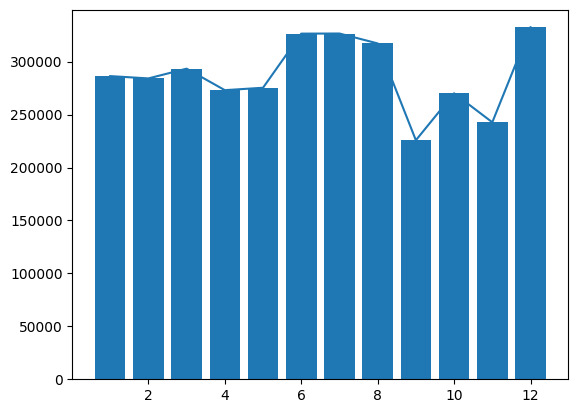

In [27]:
#2007년 도착지연횟수 월별 집계
import MySQLdb

conn = MySQLdb.connect(
    host="localhost", port=3306, db="ontime", user="user", passwd="1234"
)
cursor=conn.cursor()
cursor.execute('''select month, count(*) from ontime 
               where arrdelay>0
               group by month''')   #여러줄 일 때 → 따옴표 3개 사용 (''' ''' or """ """)
rows = cursor.fetchall()

for row in rows:
    print(row)

cursor.close()
conn.close()


x=list(range(1,13)) 
#list() 배열, 
#range(start, stop, step)

y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)


import matplotlib.pyplot as plt

plt.plot(x,y) #선그래프 출력
plt.bar(x,y) #막대그래프 출력
plt.show()  //그래프를 출력 